# Notebook for comparing the empirically derived f factor and that derived from the E/I method for Cut Face Sandstone

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm
import math as math

%config InlineBackend.figure_format = 'retina'

## Load Cut Face demagnetization data

In [2]:
Cutface_specimens = pd.read_csv('../../data/Pmag/cutface/specimens.txt', sep='\t', header=1)
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

## Load North Shore Volcanic Group site level paleodirection data

In [3]:
NSVG_Data=pd.read_csv('../../data/data_Compiled/Tauxe2009/pmag_results.txt',sep='\t',skiprows=1)
nneu_site_list = ['ns002',
                  'ns003',
                  'ns004',
                  'ns005',
                  'ns016',
                  'ns018',
                  'ns019',
                  'ns020',
                  'ns021',
                  'ns022',
                  'ns023',
                  'ns028',
                  'ns030',
                  'ns031',
                  'ns032']
nneu_data = NSVG_Data.loc[NSVG_Data['er_site_names'].isin(nneu_site_list)]
Books1972_sites = pd.read_csv('../../data/data_compiled/Books1972/sites.txt',sep='\t',header=1)
Books1972_MN_sites = Books1972_sites[Books1972_sites.location == 'North Shore Volcanic Group:Minnesota']
nneu_nmil_sites_B72 = ['NS269','NS378','NS227']
nneu_nkcr_sites_B72 = ['NS229','NS375']
nneu_nrcb_sites_B72 = ['NS226']
nneu_ncvb_sites_B72 = ['NS362','NS365']
nneu_ngha_sites_B72 = ['NS367','NS265']
nneu_ntpb_sites_B72 = ['NS368',
                       'NS369',
                       'NS374',
                       'NS376',
                       'NS377',
                       'NS169',
                       'NS170',
                       'NS171']
nneu_norl_sites_B72 = ['NS370',
                       'NS371',
                       'NS372']
nneu_B72_site_list = nneu_nmil_sites_B72 + nneu_nkcr_sites_B72 + nneu_nrcb_sites_B72 + nneu_ncvb_sites_B72 + nneu_ngha_sites_B72 + nneu_norl_sites_B72 
nneu_data_B72 = Books1972_MN_sites.loc[Books1972_MN_sites['site'].isin(nneu_B72_site_list)]
nneu_combined_dir_dec = nneu_data_B72.dir_dec.tolist() + nneu_data.average_dec.tolist()
nneu_combined_dir_inc = nneu_data_B72.dir_inc.tolist() + nneu_data.average_inc.tolist()


nneu_dirs = ipmag.make_di_block(nneu_combined_dir_dec,
                                nneu_combined_dir_inc)
nneu_dir_mean=pmag.fisher_mean(nneu_dirs)

## common mean test for CF-MT vs CF-HT (with f factors ranging from 0.5 to 0.7)

commen mean test between the mid-temperature component and the high-temperature component of Cut Face directions

This method is for empirically deriving the f factor by interating through a range of values for f to unsquish the high-temperature component of specimen directions and use the Watson commen mean test for judging whether the resulting directions share a common mean with the mid-temperature directions which are interepreted to be CRMs and do not suffer from inclination shallowing.

In [ ]:
mt_directions_block=ipmag.make_di_block(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
ht_directions_block=ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())

spec_ht_inc=specimens_ht_tc['dir_inc'].tolist()
spec_ht_dec=specimens_ht_tc['dir_dec'].tolist()

In [ ]:
f_factors = np.arange(0.5,0.7,.001)

successful_f_factors_mt = []
successful_angles_mt = []

for f_fact in f_factors:

    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_fact)
    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(ht_unsquished_directions_block, mt_directions_block,NumSims=300,print_result=False)
    if watson_common_mean[0] == 1:
        successful_f_factors_mt.append(f_fact)
        successful_angles_mt.append(watson_common_mean[1])

In [ ]:
#good_f_factors_mt=np.array(successful_f_factors_mt)
#np.savetxt('good_f_factors_mt.txt',good_f_factors_mt)
#good_angles_mt=np.array(successful_angles_mt)
#np.savetxt('good_angles_mt.txt',good_angles_mt)

## common mean test for CF-MT vs CF-HT (with f factors ranging from 0.1 to 1)

In [ ]:
f_factors = np.arange(0.1,1,.005)

all_f_factors_mt = []
all_angles_mt = []

for f_fact in f_factors:

    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_fact)
    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(ht_unsquished_directions_block, mt_directions_block,NumSims=100,print_result=False)
    all_f_factors_mt.append(f_fact)
    all_angles_mt.append(watson_common_mean[1])



In [ ]:
#all_f_factors_mt=np.array(all_f_factors_mt)
#np.savetxt('Watson_mean_test_output/all_factors_mt.txt',all_f_factors_mt)
#all_angles_f_mt=np.array(all_angles_mt)
#np.savetxt('Watson_mean_test_output/all_angles_mt.txt',all_angles_f_mt)

## common mean test for NSVG vs CF-HT (with f factors ranging from 0.5 to 0.8)

commen mean test between the North Shore Volcanic Group directions that do not suffer from inclination shallowing and the high-temperature component of Cut Face directions.

In [ ]:
f_factors = np.arange(0.5,.8,.001)

successful_f_factors_nsvg = []
successful_angles_nsvg = []

for f_fact_nsvg in f_factors:

    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_fact_nsvg)
    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(ht_unsquished_directions_block, nneu_dirs,NumSims=300,print_result=False)
    if watson_common_mean[0] == 1:
        successful_f_factors_nsvg.append(f_fact_nsvg)
        successful_angles_nsvg.append(watson_common_mean[1])

In [ ]:
#good_f_factors_nsvg=np.array(successful_f_factors_nsvg)
#np.savetxt('good_f_factors_nsvg.txt',successful_f_factors_nsvg)
#good_angles_mt=np.array(successful_angles_nsvg)
#np.savetxt('good_angles_nsvg.txt',successful_angles_nsvg)


## common mean test for NSVG vs CF-HT (with f factors ranging from 0.1 to 1)


In [ ]:
f_factors = np.arange(0.1,1,.005)

all_factors_nsvg = []
all_angles_nsvg = []

for f_fact_nsvg in f_factors:

    ht_unsquished_incs = ipmag.unsquish(spec_ht_inc, f_fact_nsvg)
    ht_unsquished_directions_block = ipmag.make_di_block(spec_ht_dec,ht_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(ht_unsquished_directions_block, nneu_dirs,NumSims=100,print_result=False)
    all_factors_nsvg.append(f_fact_nsvg)
    all_angles_nsvg.append(watson_common_mean[1])

In [ ]:
#all_factors_nsvg=np.array(all_factors_nsvg)
#np.savetxt('all_factors_nsvg.txt',all_factors_nsvg)
#all_angles_nsvg=np.array(all_angles_nsvg)
#np.savetxt('all_angles_nsvg.txt',all_angles_nsvg)

## Performing empirical commen mean method and E/I method in context of grain sizes of Cut Face sandstone

### Clay and Silt empirical f
Watson common mean test for NSVG vs CF fine-grained specimen directions

In [96]:
cf_grain_sizes=pd.read_csv('../../data/Pmag/cf_specimen_lithologies.csv')
cf_specimens_directions_and_grain=pd.merge(cf_grain_sizes,Cutface_specimens,on='specimen')

In [97]:
cf_fine_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']<1.1) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

In [98]:
cf_fine_grain_incs=cf_fine_grain['dir_inc']
cf_fine_grain_decs=cf_fine_grain['dir_dec']

In [99]:
f_factors = np.arange(0.3,0.7,.005)

all_factors_fine_grain = []
all_angles_fine_grain = []

for f_fact_nsvg in f_factors:

    fine_grain_unsquished_incs = ipmag.unsquish(cf_fine_grain_incs.tolist(), f_fact_nsvg)
    fine_grain_unsquished_directions_block = ipmag.make_di_block(cf_fine_grain_decs.tolist(),fine_grain_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(fine_grain_unsquished_directions_block, nneu_dirs,NumSims=100,print_result=False)
    if watson_common_mean[0] == 1: 
        all_factors_fine_grain.append(f_fact_nsvg)
        all_angles_fine_grain.append(watson_common_mean[1])

In [100]:
print(round(all_factors_fine_grain[all_angles_fine_grain.index(min(all_angles_fine_grain))],4),'for specimens predominantly clay and silt')

0.54 for specimens predominantly clay and silt


Bootstrapping.... be patient

The original inclination was: 25.386077541278503

The corrected inclination is: 32.65885446014979
with bootstrapped confidence bounds of: 26.143221323018942 to 40.318114695377794
and elongation parameter of: 2.1526176772336885
The flattening factor is: 0.7299999999999998


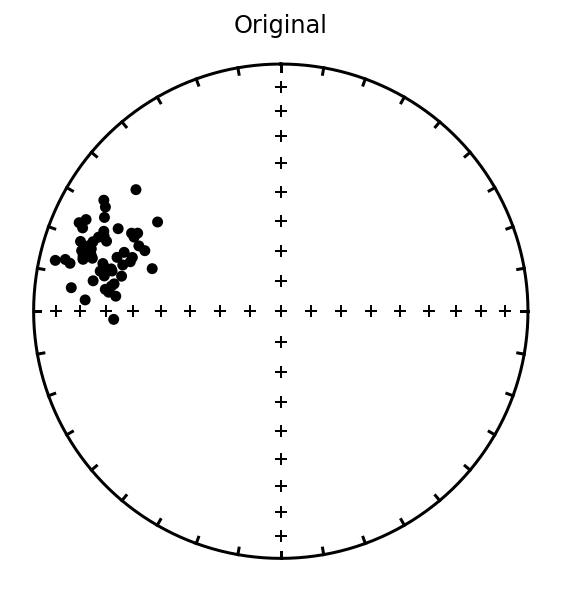

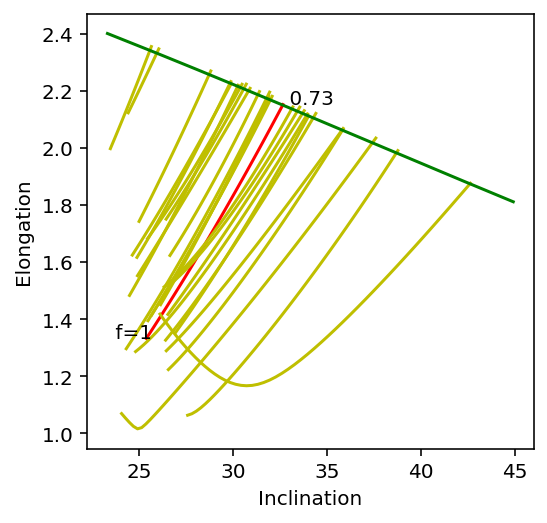

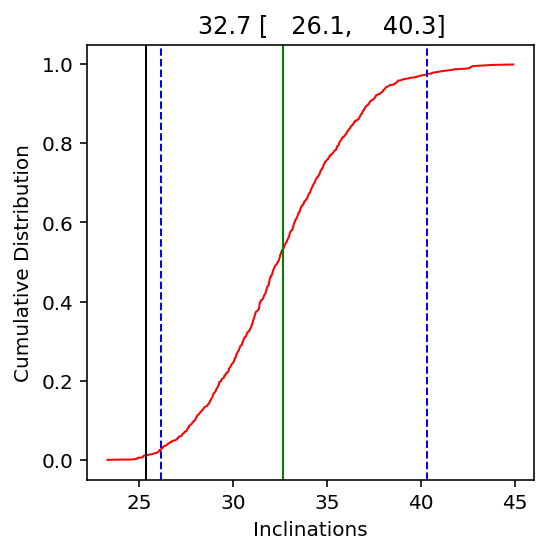

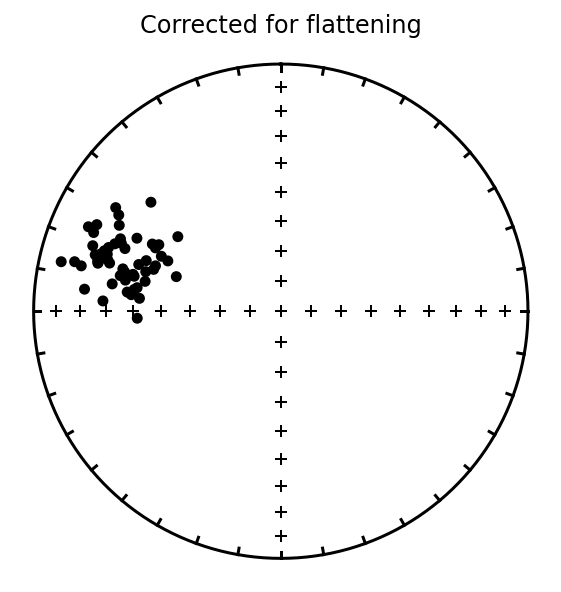

In [26]:
cf_fine_block=ipmag.make_di_block(cf_fine_grain_decs.tolist(),cf_fine_grain_incs.tolist())

ipmag.find_ei(np.array(cf_fine_block))

### Very fine sand grain f

Watson common mean test for NSVG vs CF very fine-grained specimen directions

In [101]:
cf_med_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']==2) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]

In [102]:
cf_med_grain_incs=cf_med_grain['dir_inc']
cf_med_grain_decs=grain_decs=cf_med_grain['dir_dec']

In [103]:
f_factors = np.arange(0.4,.8,.005)

good_factors_med_grain = []
good_angles_med_grain = []

for f_fact_nsvg in f_factors:

    cf_med_unsquished_incs = ipmag.unsquish(cf_med_grain_incs.tolist(), f_fact_nsvg)
    cf_med_unsquished_directions_block = ipmag.make_di_block(cf_med_grain_decs.tolist(),cf_med_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(cf_med_unsquished_directions_block, nneu_dirs,NumSims=100,print_result=False)
    if watson_common_mean[0] == 1: 
        good_factors_med_grain.append(f_fact_nsvg)
        good_angles_med_grain.append(watson_common_mean[1])

In [104]:
print(round(good_factors_med_grain[good_angles_med_grain.index(min(good_angles_med_grain))],4),'for specimens predominantly very fine sand')

0.655 for specimens predominantly very fine sand


Bootstrapping.... be patient

The original inclination was: 29.775232457295857

The corrected inclination is: 36.31763319766917
with bootstrapped confidence bounds of: 28.97058584190217 to 49.29802440685778
and elongation parameter of: 2.049611061402515
The flattening factor is: 0.7699999999999998


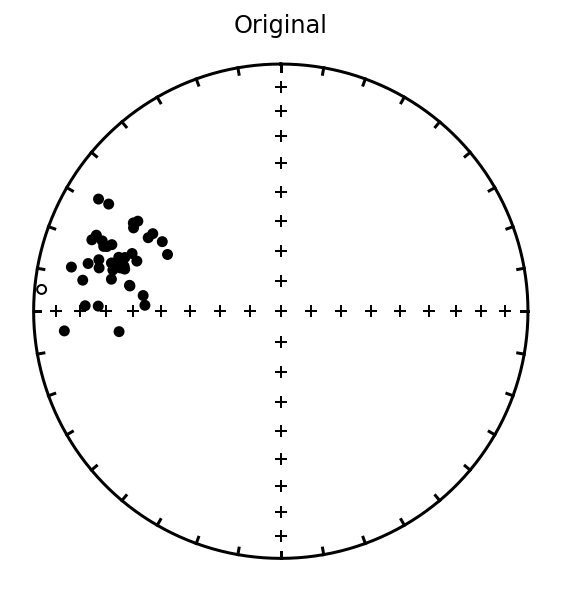

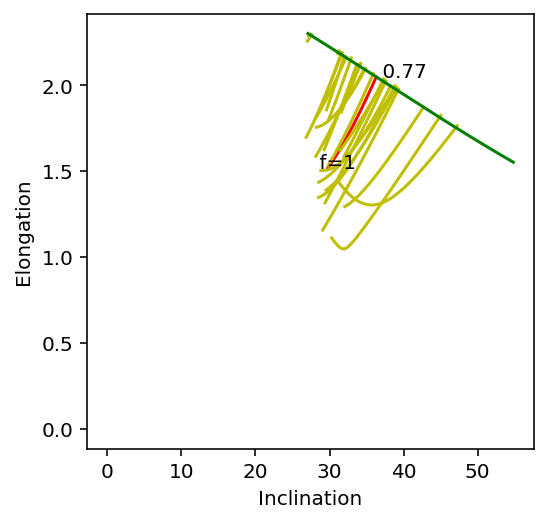

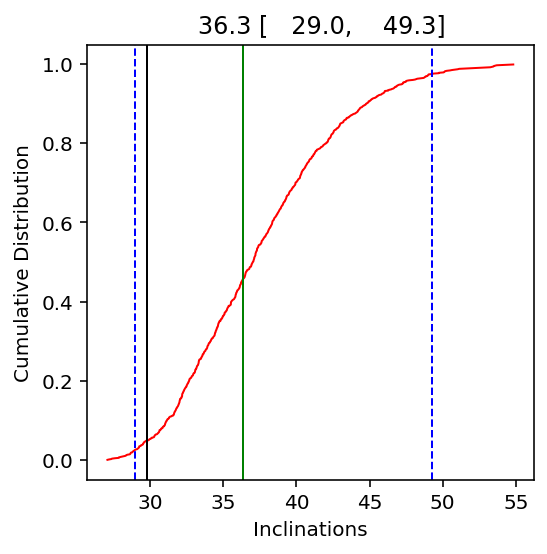

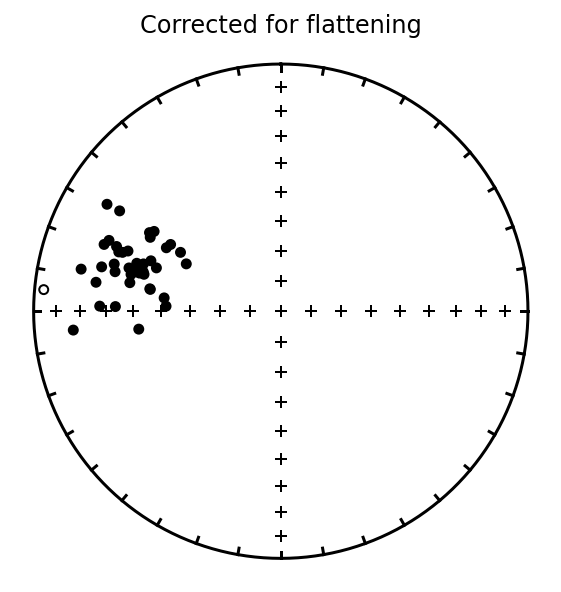

In [32]:
cf_med_block=ipmag.make_di_block(cf_med_grain_decs.tolist(),cf_med_grain_incs.tolist())

ipmag.find_ei(np.array(cf_med_block))

### fine and medium sand f

In [105]:
cf_c_grain=cf_specimens_directions_and_grain[(cf_specimens_directions_and_grain['primary_grain_size']>2) & (cf_specimens_directions_and_grain['dir_comp']=='ht')&(cf_specimens_directions_and_grain['dir_tilt_correction']==100)]
cf_c_grain_incs=cf_c_grain['dir_inc']
cf_c_grain_decs=grain_decs=cf_c_grain['dir_dec']

In [115]:
f_factors = np.arange(0.55,.9,.005)

good_factors_c_grain = []
good_angles_c_grain = []

for f_fact_nsvg in f_factors:

    cf_c_unsquished_incs = ipmag.unsquish(cf_c_grain_incs.tolist(), f_fact_nsvg)
    cf_c_unsquished_directions_block = ipmag.make_di_block(cf_c_grain_decs.tolist(),cf_c_unsquished_incs)
    watson_common_mean = ipmag.common_mean_watson(cf_c_unsquished_directions_block, nneu_dirs,NumSims=500,print_result=False)
    if watson_common_mean[0] == 1: 
        good_factors_c_grain.append(f_fact_nsvg)
        good_angles_c_grain.append(watson_common_mean[1])

In [116]:
print(round(good_factors_c_grain[good_angles_c_grain.index(min(good_angles_c_grain))],4),'for specimens predominantly fine and medium sand')

0.73 for specimens predominantly fine and medium sand


Bootstrapping.... be patient

The original inclination was: 32.23555798194221

The corrected inclination is: 51.556590311224475
with bootstrapped confidence bounds of: 37.20338594407238 to 62.12871909688303
and elongation parameter of: 1.6416871638238375
The flattening factor is: 0.48499999999999954


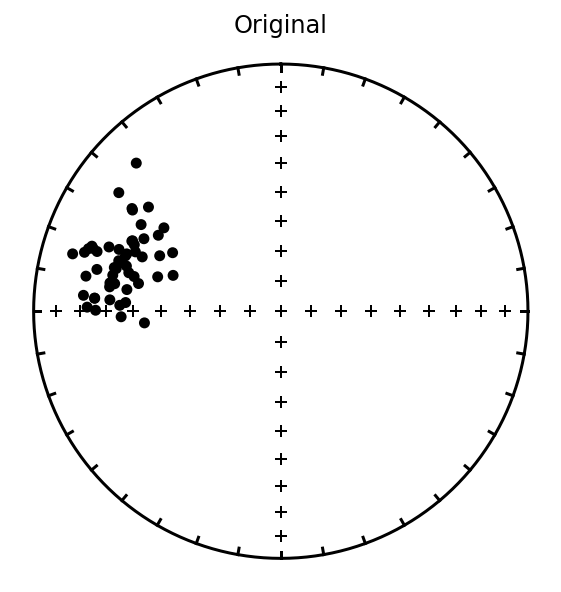

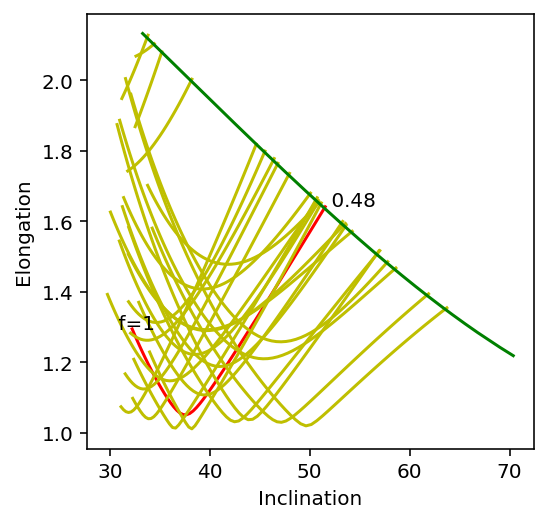

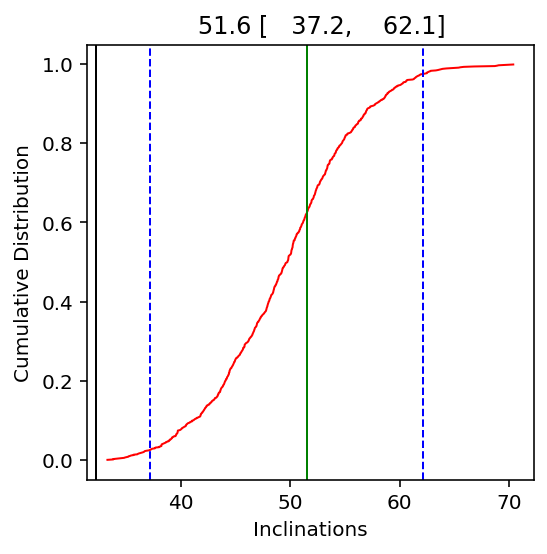

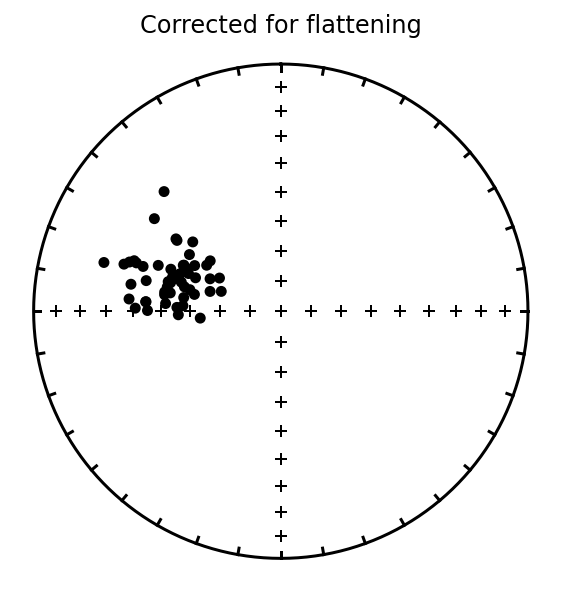

In [108]:
cf_c_block=ipmag.make_di_block(cf_c_grain_decs.tolist(),cf_c_grain_incs.tolist())

ipmag.find_ei(np.array(cf_c_block))